# Mall Clustering
Author: Sam Steinberg, Computer Science Student- Arizona State University

Description: The goal of this project is to cluster a mall's customers based on their income and spending score (the more money they spend, the higher their scores goes up). I want to identify which customers spend the most money at the mall. Once this sector is identified, the mall can tailor new ads, products, etc. to these people with the hopes of increasing revenue. In addition, they will know which companies to lease out new retail space to. 

## Step 1- Importing Libraries and Dataset

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Step 2- Finding Optimal Number of Clusters


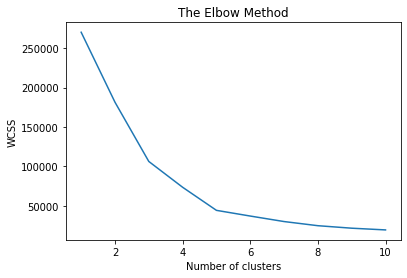

In [56]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): #10 clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42) #k-means++ avoid the rabdin initialization trap
    kmeans.fit(X) #Fitting our data
    wcss.append(kmeans.inertia_) #Inertia computes within clusters sum of squares
    
#Plotting the Elbow Method Graph 
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Step 3- Training K-Means Model on Dataset

In [57]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X) #Returns which cluster the client belongs to
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Step 4- Visualizing Clusters

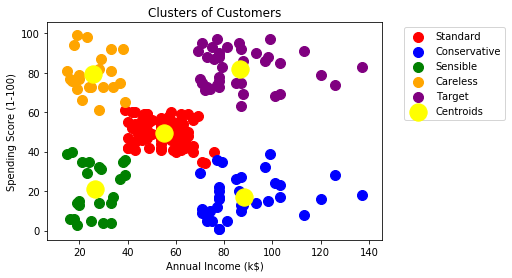

In [58]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Conservative')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Step 5- Investigating Target Cluster

### Investigating Careless Cluster

In [59]:
from copy import copy, deepcopy
df = dataset.copy()
indexes = df[df['Annual Income (k$)'] < 67].index
df.drop(indexes, inplace=True)
indexes2 = df[df['Spending Score (1-100)'] < 61].index
df.drop(indexes2, inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


In [60]:
df['Genre'].value_counts()

Female    21
Male      18
Name: Genre, dtype: int64

(array([ 5.,  3.,  5., 11.,  1.,  1.,  6.,  0.,  3.,  4.]),
 array([27. , 28.3, 29.6, 30.9, 32.2, 33.5, 34.8, 36.1, 37.4, 38.7, 40. ]),
 <a list of 10 Patch objects>)

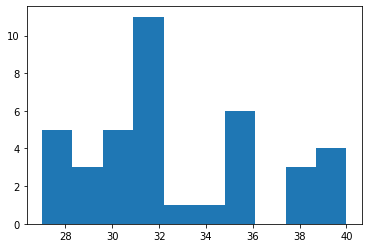

In [61]:
df['Age'].value_counts()
plt.hist(df['Age'])

Text(0.5, 1.0, 'Gender vs. Spending Score')

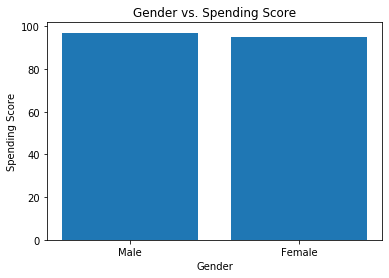

In [62]:
plt.bar(df['Genre'], df['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Gender vs. Spending Score')

## Insights
- Gender has no effect on our target cluster (mall needs to make sure they are prioritizing both genders equally)
- Customers in this cluster are all less than 40, peaking at ages 31-32.

## Conclusion
- Customers that spend the most amount of money at the mall are individuals who earn more than $67,000 anually with a spending score above 60. These people are both male and female, and are typically around 28-32 years old.
- Companies in the store should put more effort in advertising higher priced items that appeal to this age group. They can save money by spending less advertising on customers not in our target cluster. 
- When leasing out space in the mall, we should choose companies who sell higher priced items that appeal to both genders. The products found in these stores should appeal to 28-32 year olds.
- Example of ideal stores to place in our mall: Apple, Microsoft, Tesla, Nordstrom, etc. 